<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Илья, рад вновь приветствовать тебя! <br />
<br />    

<br />
Меня зовут Николай. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />

# Описание проекта

Необходимо подготовить для компании прототип алгоритма машинного обучения. Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
#  Подключаем модуль управления тиками:
import matplotlib.ticker as ticker

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [2]:
#Выгружаем данные 
train_data=pd.read_csv('./datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
test_data=pd.read_csv('./datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
data=pd.read_csv('./datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

In [3]:
#Расчитываем эффективность обогащения
C=train_data['rougher.output.concentrate_au']
F=train_data['rougher.input.feed_au']
T=train_data['rougher.output.tail_au']
train_data['rougher.output.recovery_calculated']=((C*(F-T))/(F*(C-T)))*100

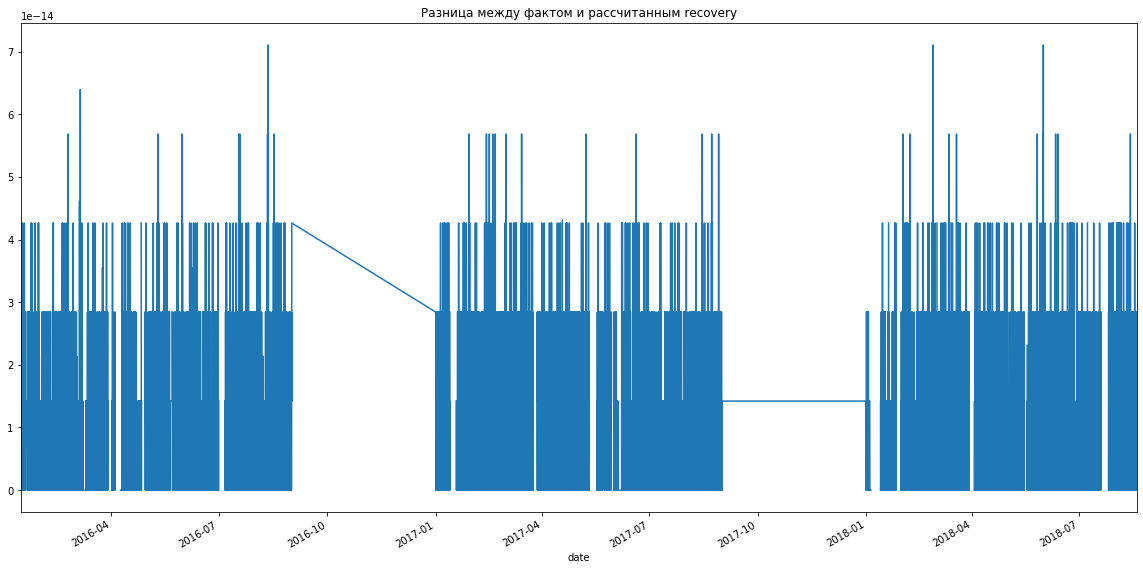

MAE: 9.444891926100695e-15


In [4]:
delta=abs(train_data['rougher.output.recovery']-train_data['rougher.output.recovery_calculated'])
delta.plot(figsize=(20,10))
plt.title('Разница между фактом и рассчитанным recovery')
plt.show()
print('MAE:',delta.mean())

<div style="border:solid  green  2px; padding: 20px">
Надеюсь лучше
</div>

In [5]:
train_data.head(5)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery_calculated
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


In [6]:
#Чтобы всё было видно
pd.options.display.max_columns = None

<div style="border:solid  green  2px; padding: 20px">
    <H2>Описание данных</H2>
        <H3>Признаки</H3>
        Наименование признаков имеет следующую структуру:<br>
        [этап].[тип_параметра].[название_параметра]
        <H4>Возможные значения для блока [этап]:</H4>
            - rougher — флотация<br>
            - primary_cleaner — первичная очистка<br>
            - secondary_cleaner — вторичная очистка<br>
            - final — финальные характеристики<br>
        <br>
        <H4>Возможные значения для блока [тип_параметра]:</H4>
            - input — параметры сырья<br>
            - output — параметры продукта<br>
            - state — параметры, характеризующие текущее состояние этапа<br>
            - calculation — расчётные характеристики<br>
        <br>
        <H4>Возможные значения для блока [название_параметра]:</H4>
            - air amount — объём воздуха<br>
            - fluid levels — уровень жидкости<br>
            - feed size — размер гранул сырья<br>
            - feed rate — скорость подачи<br>
            - concentrate_ag - доля серебра в концентрате<br>
            - concentrate_pb - доля свинца в концентрате<br>
            - concentrate_sol - доля примесей в концентрате<br>
            - concentrate_au - доля золота в концентрате<br>
            - recovery - эффективность обогащения<br>
            - tail_ag - доля серебра в отвальных хвостах<br>
            - tail_pb - доля свинца в отвальных хвостах<br>
            - tail_sol - доля примесей в отвальных хвостах<br>
            - tail_au - доля золота в отвальных хвостах<br>
            <H5>Флотационные реагенты</H5>
                - sulfate - концентрация сульфатов<br>
                - depressant — концентрация депрессанта (силикат натрия)<br>
                - xanthate - концентрация  ксантогенат<br>
        <br>
        <H3>Прогнозируемые величины</H3>
        - rougher.output.recovery — эффективность обогащения чернового концентрата<br>
        - final.output.recovery - эффективность обогащения финального концентрата<br>
</div>

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
наглядно)

In [7]:
#посмотрим на названия столбцов
for name in train_data.columns:
    print(name)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.input.sulfate
primary_cleaner.input.depressant
primary_cleaner.input.feed_size
primary_cleaner.input.xanthate
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
primary_cleaner.state.floatbank8_a_air
primary_cleaner.state.floatbank8_a_level
primary_cleaner.state.floatbank8_b_air
primary_cleaner.state.floatbank8_b_level
primary_cleaner.state.floatbank8_c_air
primary_cleaner.state.floatbank8_c_level
primary_cleaner.state.floatbank8_d_air
primary_cleaner.state.floatbank8_d_level
rougher.calculation.sulfate_to_au_concentrate
rougher.ca

In [8]:
train_data.info()
test_data.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_c

In [9]:
#Заполняем пропуски предыдущими значениями
train_data.fillna(method='ffill', inplace=True)
data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)

In [10]:
train_data.info()
test_data.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
final.output.concentrate_ag                           16860 non-null float64
final.output.concentrate_pb                           16860 non-null float64
final.output.concentrate_sol                          16860 non-null float64
final.output.concentrate_au                           16860 non-null float64
final.output.recovery                                 16860 non-null float64
final.output.tail_ag                                  16860 non-null float64
final.output.tail_pb                                  16860 non-null float64
final.output.tail_sol                                 16860 non-null float64
final.output.tail_au                                  16860 non-null float64
primary_cleaner.input.sulfate                         16860 non-null float64
primary_cleaner.input.depressant                      16860 non-null float64
primary_c

Эффективность обогащения рассчитывается по формуле:<br>
$Recovery = \frac{ C \times (F-T)}{F \times (C - T)}$<br>
где:<br>
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.


In [11]:
#Расчитываем эффективность обогащения
C=train_data['rougher.output.concentrate_au']
F=train_data['rougher.input.feed_au']
T=train_data['rougher.output.tail_au']
train_data['rougher.output.recovery_calculated']=((C*(F-T))/(F*(C-T)))*100

In [12]:
#Выбросим лишнее
train_data=train_data[train_data['rougher.input.feed_au']!=0]
test_data=test_data[test_data['rougher.input.feed_au']!=0]
data=data[data['rougher.input.feed_au']!=0]

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='red'>
Посмотри, пожалуйста тут ещё раз: mae должно быть почти 0(((<br>
Может заполнять пропуски надо чуть позже....<br>


In [13]:
#Из графика видно, что есть несколько аномальных значений, выбросим их как ненужные
train_data=train_data[((train_data['rougher.output.recovery']-train_data['rougher.output.recovery_calculated'])<100) & 
                      ((train_data['rougher.output.recovery']-train_data['rougher.output.recovery_calculated'])>-100)]

In [14]:
#Найдите MAE между вашими расчётами и значением признака.
mean_absolute_error(train_data['rougher.output.recovery'],train_data['rougher.output.recovery_calculated'])

1.735645742864028

In [15]:
#Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
#train_data.info()
for column in train_data:
    if column in test_data.columns:
        print(column)

primary_cleaner.input.sulfate
primary_cleaner.input.depressant
primary_cleaner.input.feed_size
primary_cleaner.input.xanthate
primary_cleaner.state.floatbank8_a_air
primary_cleaner.state.floatbank8_a_level
primary_cleaner.state.floatbank8_b_air
primary_cleaner.state.floatbank8_b_level
primary_cleaner.state.floatbank8_c_air
primary_cleaner.state.floatbank8_c_level
primary_cleaner.state.floatbank8_d_air
primary_cleaner.state.floatbank8_d_level
rougher.input.feed_ag
rougher.input.feed_pb
rougher.input.feed_rate
rougher.input.feed_size
rougher.input.feed_sol
rougher.input.feed_au
rougher.input.floatbank10_sulfate
rougher.input.floatbank10_xanthate
rougher.input.floatbank11_sulfate
rougher.input.floatbank11_xanthate
rougher.state.floatbank10_a_air
rougher.state.floatbank10_a_level
rougher.state.floatbank10_b_air
rougher.state.floatbank10_b_level
rougher.state.floatbank10_c_air
rougher.state.floatbank10_c_level
rougher.state.floatbank10_d_air
rougher.state.floatbank10_d_level
rougher.state.f

**Вывод**: в исходных данных много пустых значений, выкидывать их нецелесообразно, а так как по условию соседние по времени параметры часто похожи, то мы пропуски заполнили предыдущими значениями, что соответствует указанному условию:

>Соседние по времени параметры часто похожи

Для групппы значений в размере 1213 значений наблюадется ситуация, что концентрация золота (да и всего хим состава пульпы) на входе в блок флотации равна нуль, как следствие в числители дроби у нас образуются 0, что в итоге даёт нам inf. Возможная причина этой ошибки - неучтённое временное (транспортное) запаздывание, которое характеризуется технологическим процессом и определяет время, в течении которога часть золотосодержащего потока проходит от начала блока флотации, к его концу. Поэтому эту часть данных мы выбросим для корректности расчётов.

После подсчётов выбросим ещё часть лишних данных (249 строк), которые дают recovery больше 100% (концентрация не может быть больше 100 %, следовательно recovery тоже)

Итоговое значение MAE равняется ~3. Данную величину можно ещё больше уменьшить, если отбросить ещё часть аномальных значений

В файле test отсутствуют features, которые определяют параметры на выходе из каждого блока (флотации/очистки), т.е. те, для анализ которых выполняется через некоторое время. Следовательно для моделей машинного обучения на вход системы мы будем подавать только те признаки из файла train, которые присутствуют в test

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
внимательное исследование 1213 значений)) интересно.<br>
По mae  - уже писал, надо глянуть..(((

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
По тестовой выборке: в общем, да, вывод такой. 
там недоступны некоторые расчетные (calculation) и выходные (output) характеристики процесса, т.к. их невозможно получить/измерить во время выполнения технологического процесса. 

# 2. Анализ данных

In [16]:
#Привязываться к датам не особо нужно, поэтому просто удалим их
data.reset_index(drop=False, inplace=True)
train_data.reset_index(drop=False, inplace=True)
test_data.reset_index(drop=False, inplace=True)

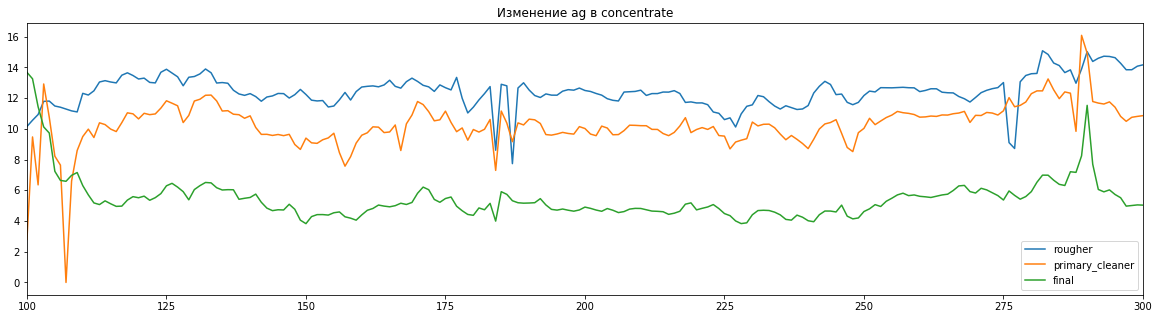

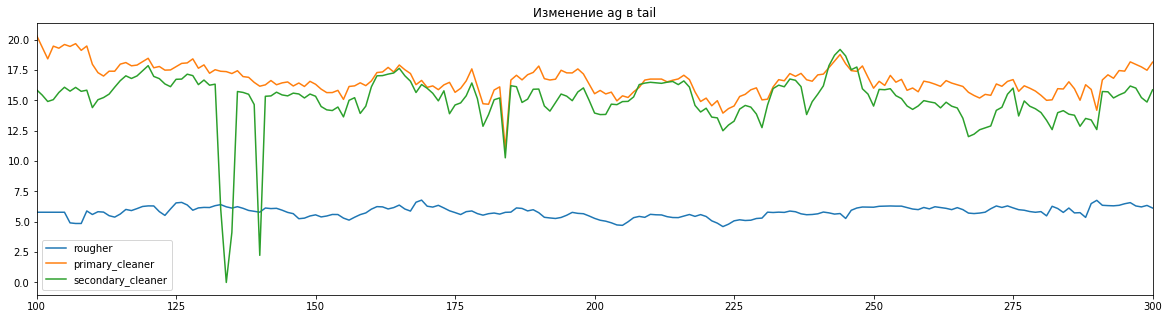

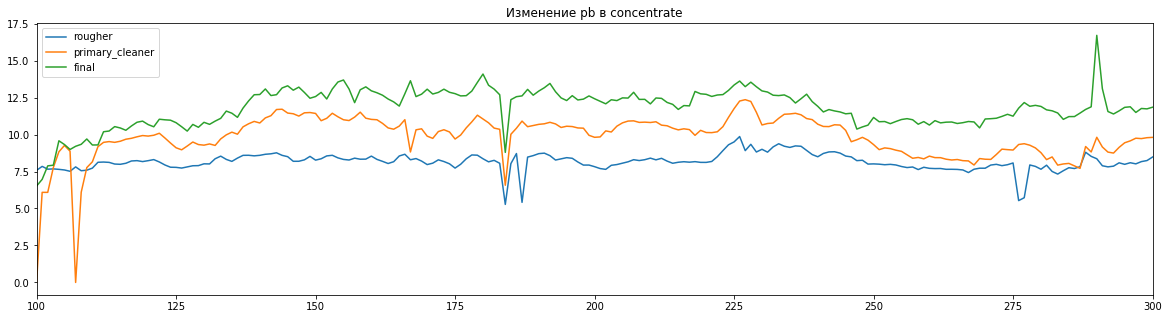

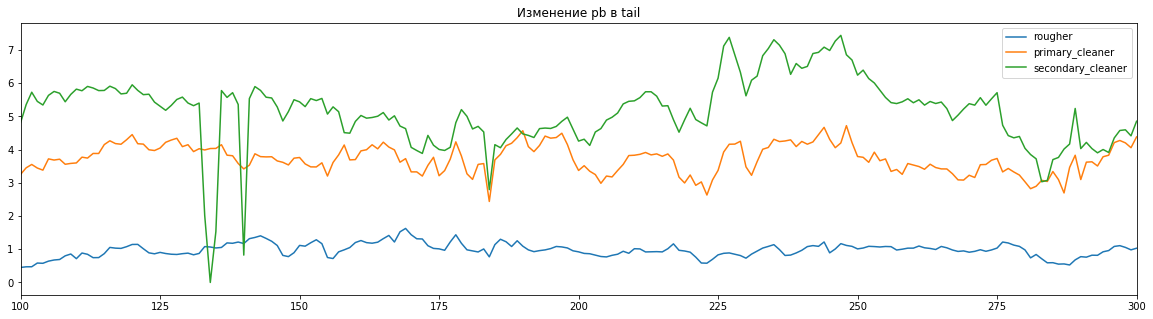

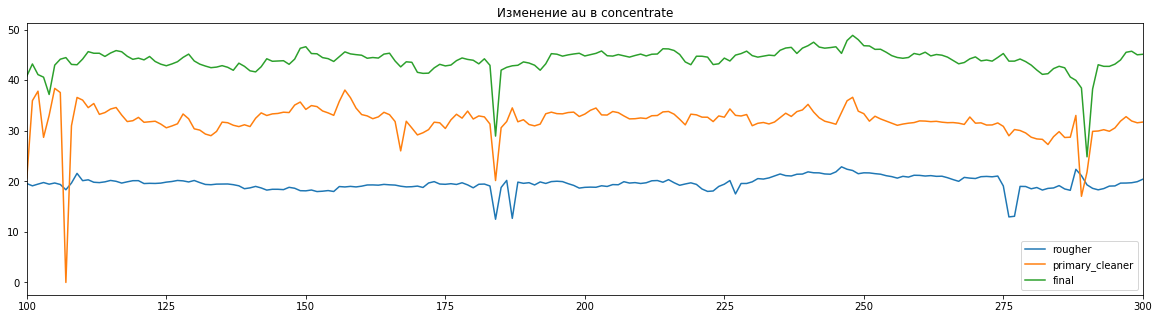

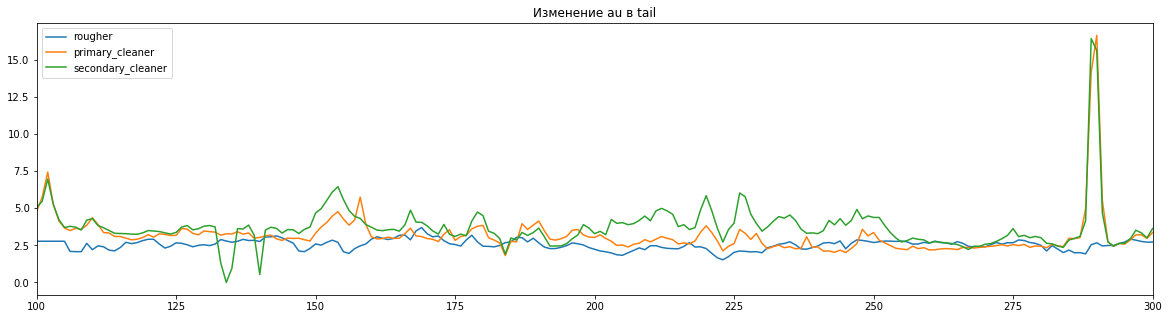

In [17]:
#Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
states=['rougher','primary_cleaner','secondary_cleaner']
metals=['ag','pb','au']
parts=['concentrate', 'tail']

for metal in metals:
    for part in parts:
        plt.figure(figsize=(20,5))
        for i,state in enumerate(states):
            if i==2 and part=='concentrate':
                state='final'
            column_name=f'{state}.output.{part}_{metal}'
            #Добавляем series на график и используем только 100 щначений
            data.loc[100:300,column_name].plot(label=state)
            plt.title(f'Изменение {metal} в {part}')
            plt.legend()
        plt.show()

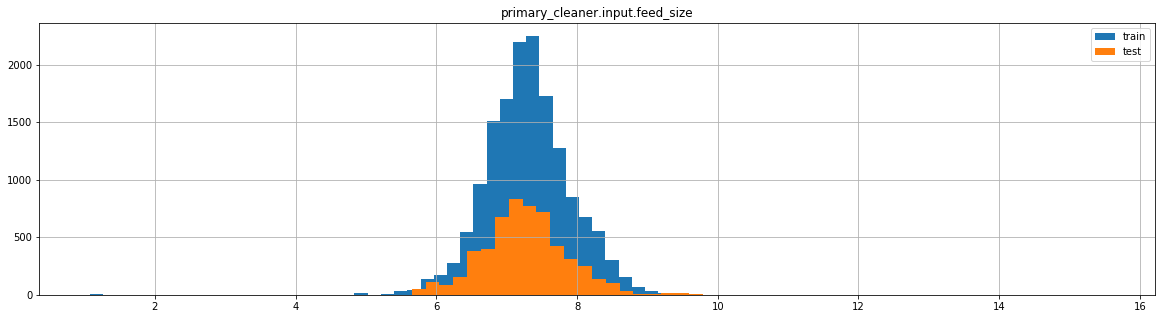

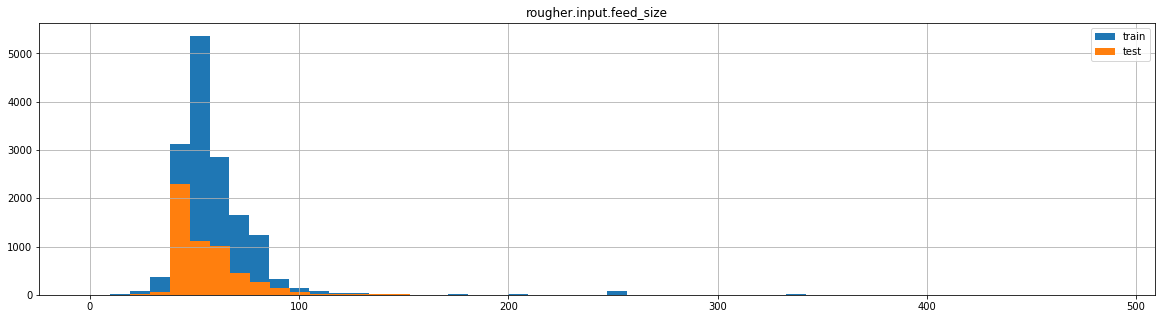

In [18]:
#Сравните распределения размеров гранул сырья на обучающей и тестовой выборках
states=['primary_cleaner.input.feed_size', 'rougher.input.feed_size']
dfs=[train_data, test_data]

for state in states:
    plt.figure(figsize=(20,5))
    dfs[0][state].hist(bins=50,label='train')
    dfs[1][state].hist(bins=50,label='test')
    plt.title(state)
    plt.legend()
    plt.show()

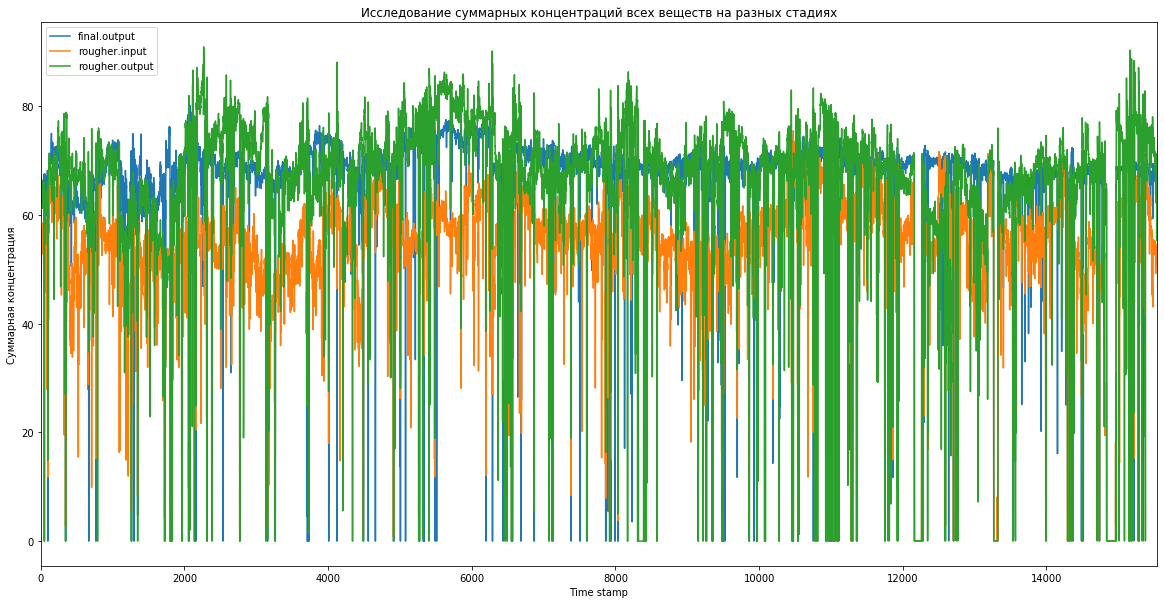

In [19]:
#Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
states=['final.output', 'rougher.input', 'rougher.output']
params=['concentrate_', 'feed_','concentrate_']
metals=['ag','pb','au', 'sol']

df_for_parse=pd.DataFrame(columns=states)


for state in zip(states,params):
    #Вычисляем суммарную концентрацию (на забываем сделать её копию, чтобы не менять) на оубчающем
    sum_concentrate=train_data[f'{state[0]}.{state[1]}{metals[0]}'].copy()
    for metal in metals[1:]:
        sum_concentrate+=train_data[f'{state[0]}.{state[1]}{metal}']
    df_for_parse[state[0]]=sum_concentrate


df_for_parse.plot(figsize=(20,10))
plt.legend()
plt.title('Исследование суммарных концентраций всех веществ на разных стадиях')
plt.ylabel('Суммарная концентрация')
plt.xlabel('Time stamp')
plt.show()

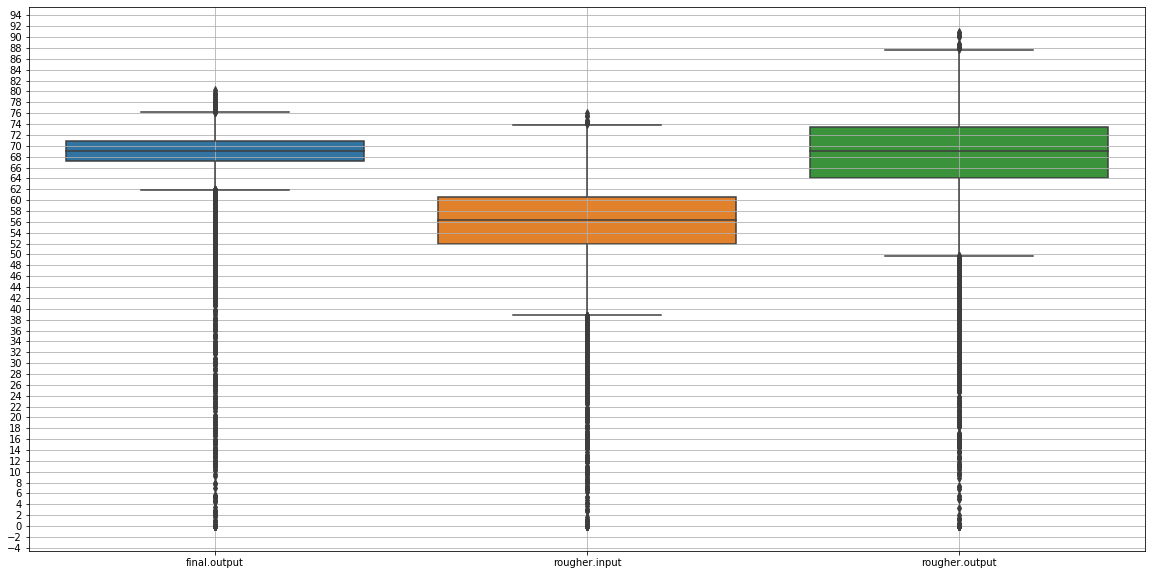

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df_for_parse, 
            ax=ax)
#  Устанавливаем интервал основных делений:
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.grid()
plt.show()

In [21]:
train_data['sum_concentrate']=(train_data['rougher.input.feed_ag']+
                              train_data['rougher.input.feed_pb']+
                             train_data['rougher.input.feed_sol']+
                             train_data['rougher.input.feed_au'])

In [22]:
#Вычислим суммарную концентрацию на rougher.input на тестовом
test_data['sum_concentrate']=(test_data['rougher.input.feed_ag']+
                              test_data['rougher.input.feed_pb']+
                             test_data['rougher.input.feed_sol']+
                             test_data['rougher.input.feed_au'])

In [23]:
train_data.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery_calculated,sum_concentrate
count,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,1.553800e+04,1.553800e+04,1.553800e+04,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.

In [24]:
upper_outler=train_data['sum_concentrate'].mean()+3*train_data['sum_concentrate'].std()
lower_outler=train_data['sum_concentrate'].mean()-3*train_data['sum_concentrate'].std()

In [25]:
#Выбрасываем все выбросы (выше и неже 3сигма)
train_data=train_data[(train_data['sum_concentrate']<upper_outler) & (train_data['sum_concentrate']>lower_outler)]
test_data=test_data[(test_data['sum_concentrate']<upper_outler) & (test_data['sum_concentrate']>lower_outler)]

In [26]:
#Также выбрасываем все значения с нулевыми значениями целевых признаков, так как это тоже мусор
train_data=train_data[(train_data['rougher.output.recovery']>0) & (train_data['final.output.recovery']>0)]

In [27]:
data.set_index('date', inplace=True)
test_data.set_index('date', inplace=True)
train_data.set_index('date', inplace=True)

In [28]:
test_target=data.loc[test_data.index][['rougher.output.recovery', 'final.output.recovery']]

In [29]:
#Привязываться к датам не особо нужно, поэтому просто удалим их
data.reset_index(drop=True, inplace=True)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [30]:
#Найдите MAE между вашими расчётами и значением признака после устранения всех выбросов
mean_absolute_error(train_data['rougher.output.recovery'],train_data['rougher.output.recovery_calculated'])

0.9486424838679274

**Вывод**: анализ данных осуществляется на датасете data. 
По мере продвижения пульпы по технологии доля серебра в концентрате планомерно уменьшается от одного этапа очистки к другому, а в хвостах наоборот, увеличивается, однако стоит отметить, что большая часть серебра уходит в хвосты на этапе флотации, а на этапах очистки концентрация серебра изменяется незначительно. Для свинца и золота ситуация противоположная: по мере очистки обогащения и очистки сырья их доля в концентрате повышается. Стоит отметить, что концентрация золота в хвостах менается в меньшей степени, чем концентрация других металлов (и это логично, что унос золота через хвосты следует свести к минимуму).<br>
Распределения по размеру части имеют почти одинаковый характер, а разница в высотах колокола обусловлена размерами выборок
Часть аномалий в концентрациях (вроде 0 концентрации веществ при ненулевом уровне конверсии была уже устранена. От остальных аномалий мы избавляемся с помощью boxplot, на основании которых определяем значения 25% и 75% квантилей. Выбрасываем мы только те значения, которые выходят за указанные квантили (39,74) только в столбце rougher.input, так как остальные 2 столбца не являются входами модели машинного обучения.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
Отличный графический анализ). Наглядно и доступно для изучения - здорово.<br>
Золота становится больше от этапа к этапу - ураааа, наше производство работает.<br>
Свинец растёт на втором этапе - это нормально, т.к. является побочным явлением химических реакций.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
В целом работа по удалению выбросов - ОК. здорово вышло<br>

В некоторых проектах - это важно, избавиться от выбросов<br>

А вот если обратиться к нашему проекту:<br>
1) Есть нулевые аномалии - и их надо "убить" это точно: просто зачем нам нулевые измерения.<br>
<font color='orange'>    
2)А вот с выбросами как в приниципе..<br>
Тут на обсуждение: наша цель - предсказывать модель на реальных данных. И вот эти выбросы - это и есть реальная концентрация. И нам важно, чтобы модель умела и их тоже видеть и обрабатывать. Если их убрать из модели, то получится, что у нас она станет как бы искусственной. Т.е. будет работать только в небольших диапазонах - потому что обучалась только в них.<br>
    
Поэтому, тут так: выбросы - это не всегда то, от чего надо избавляться))) Ещё зависит от бизнес-задачи.<br>
    
Кстати<br>
если говорить о теории выбросов, то вот это интервал q3+-1.5*iqr говорит действильно о них самых<br>
Но нет рекоммендаций к их удалению. Говорят так "на усмотрение бизнеса".<br>
А вот если взять вот этот интервал q3+3*iqr:  то тут уж с очень высокой вероятность можно говорить о грубых выбросах.

<div style="border:solid  green  2px; padding: 20px">
Исправил. Забавно что точность модели снизилась
</div>

# 3. Модель

Эффективность обогащения рассчитывается по формуле:<br>
$sMAPE = \frac{1}{N}\sum \frac{|y_i-\widehat{y_i}|}{(|y_i|+|\widehat{y_i}|)/2}\times100%%$<br>

In [31]:
def sMAPE(actual, predicted):
    actual=np.array(actual)
    predicted=np.array(predicted)
    
    numerator=np.abs(actual-predicted)*2
    denominator=np.abs(actual)+np.abs(predicted)
    
    return (numerator/denominator).mean()*100

Итоговая метки:
Итоговое sMAPE=25%*sMAPE(rougher)+75%*sMAPE(final)

In [32]:
def final_sMAPE(actual,predicted):
    actual=np.array(actual)
    predicted=np.array(predicted)
    return (0.25*sMAPE(actual[:,0], predicted[:,0])+
            0.75*sMAPE(actual[:,1], predicted[:,1]))

In [33]:
#Прогнозируемые значения из набора для обучения
train_target=train_data[['rougher.output.recovery', 'final.output.recovery']]

## Статическая модель с прогнозированием по медиане

In [34]:
train_median=pd.DataFrame(index=train_target.index)
train_median['rougher.output.recovery']=train_data['rougher.output.recovery'].median()
train_median['final.output.recovery']=train_data['final.output.recovery'].median()
final_sMAPE(train_target, train_median)

9.851446890159316

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
принято)


## Статическая модель с прогнозированием по среднему

In [35]:
train_mean=pd.DataFrame(index=train_target.index)
train_mean['rougher.output.recovery']=train_data['rougher.output.recovery'].mean()
train_mean['final.output.recovery']=train_data['final.output.recovery'].mean()
final_sMAPE(train_target, train_mean)

9.900566977410604

## Статическая модель с прогнозированием по предыдущим значениям

In [36]:
#Один день - это 24 записи назад
train_actual=train_target[24:].reset_index(drop=True)
train_predicted=train_target[:-24].reset_index(drop=True)
final_sMAPE(train_actual, train_predicted)

10.809427175497724

## Обучаем модель машинного обучения

In [37]:
#Выделим features и targets
X=train_data[test_data.columns]
y=train_data[['rougher.output.recovery', 'final.output.recovery']]

In [38]:
#Отнормируем X
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [39]:
final_sMAPE_scorer=make_scorer(final_sMAPE, greater_is_better=False)

In [40]:
#Обучите разные модели и оцените их качество кросс-валидацией.
model=LinearRegression()
print('Линейная регрессия:',abs(cross_val_score(model, X, np.array(y), 
                                                cv=5, scoring=final_sMAPE_scorer)).mean())

Линейная регрессия: 10.412630174948102


In [41]:
%%time
param_grid = {'n_estimators' : [x for x in range(1,200,5)], 
              'max_depth' : [x for x in range(1,9)],
              'learning_rate':[x/100 for x in range(10,80,15)],}

clf = GridSearchCV (estimator = RandomForestRegressor(random_state=12345), 
                    param_grid = param_grid, 
                    scoring = final_sMAPE_scorer, 
                    cv = 5, n_jobs = -1)
clf.fit(X,y)

Wall time: 1h 18min 12s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False,
                                             random_state=12345, verbose=0,
                                             warm_start=False),
             iid='warn', n_jobs=-1,
            

In [42]:
print('Случайный лес',abs(clf.best_score_))

Случайный лес 9.155086410507144


In [43]:
%%time
param_grid_tree = {'max_depth' : [x for x in range(1,9)]}

clf_tree = GridSearchCV (estimator = DecisionTreeRegressor(random_state=12345), 
                    param_grid = param_grid_tree, 
                    scoring = final_sMAPE_scorer, 
                    cv = 5, n_jobs = -1)
clf_tree.fit(X,y)

Wall time: 2.53 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=12345,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(final_sMAPE, greater_is_better=False),


In [44]:
print('Решающее дерево',abs(clf_tree.best_score_))

Решающее дерево 9.809763366318307


In [45]:
#Выберите лучшую модель и проверьте её на тестовой выборке
clf.best_params_

{'max_depth': 4, 'n_estimators': 6}

In [49]:
model=RandomForestRegressor(random_state=12345, max_depth=4, n_estimators=6)
model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=None,
                      oob_score=False, random_state=12345, verbose=0,
                      warm_start=False)

In [50]:
print('sMAPE на обучающей выборке:', final_sMAPE(y,model.predict(X)))

sMAPE на обучающей выборке: 7.585125051275798


In [51]:
print('sMAPE на тестовой выборке',final_sMAPE(test_target,
                                              model.predict(scaler.transform(test_data))))

sMAPE на тестовой выборке 9.523647455857112


**Вывод**: статические модели можно получить разными методами: с помощью среднего или медианы из обучающей выборки или с помощью предыдущих значений на тестовых. Целесообразность последней статической модели обусловлена тем, что по сути данные у нас представляют собой временной ряд, значения которых не слишком сильно отличаются в соседних записях. Однако чтобы не брать прям ближайшие значения, будем брать за день до фактического значения. На основании статического анализа следует полагать, что модель машинного обучения должна давать точность не менее 11.16% по sMAPE.
По анализу нейронных сетей было выяснено, что наибольшую точность дают ансамбли деревьев (случайный лес). С помощью данной модели удаётся добиться 8.83% по sMAPE.
На тестовой выборке точность прогноза равна 8.9%, что ниже, чем при статических моделях 

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
<br/> Илья,  <br>
интересную работу ты провёл.<br>
модельная часть - полна и понятна, графический анализ - третьяковка:) - хорошо подчёркивает аналитику.<br>
Осмысленные и вдумчивые выводы, многовараинтность констнтной модели - многое удалось, как надо)<br>
Обрати внимание, на момент с выбросами! Есть ситуации, когда не всегда их надо удалять, например в нашем проекте.<br>
    
<font color='red'>
Посморти, пожалуйста, с mae. Там надо выходить на 0)))<br>
<font color='green'>    
Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ!
</b></font>

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
    - [ ]  Проанализированы и обработаны аномальные значения
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке